# <center>Penilaian Prestasi Kinerja Pegawai Menggunakan Fuzzy Tsukamoto
    
- __NAMA  : Ahmad Fansyuri__
- __NIM   : 09011281722052__
- __KELAS : SK5B__
- __MK    : Artificial Intelligence__

## Abstrak

<div style="text-align: justify\n"> Pengukuran kinerja pegawai pada suatu perusahaan merupakan hal yang sangat penting untuk evaluasi dan perencanaan perusahaan di masa datang. Setiap perusahaan mempunyai cara yang berbeda dalam melakukan penilaian kinerja pegawai. Penilaian kinerja harus dilakukan dengan metode yang baik dan tepat sehingga dapat menjamin perlakuan yang adil serta memuaskan bagi para pegawai yang dinilai. Hal ini dapat menumbuhkan loyalitas dan semangat kerja pegawai. Pada makalah ini dibahas pembuatan sistem penilaian kinerja pegawai menggunakan Sistem Inferensi Fuzzy Tsukamoto. Parameter yang digunakan untuk batasan fungsi keanggotaan fuzzy berdasarkan pendapat pakar yaitu tanggung jawab, kedisiplinan dan faktor pengurang. Akurasi Sistem dihitung dengan membandingkan keluaran sistem dengan penilaian pakar. Hasil uji coba menunjukkan bahwa sistem yang dibangun menghasilkan akurasi 84%. </div>

In [1]:
#Memanggil Library
#numpy berfungsi untuk menampung nilai membership function di dalam array
# #Matplotlib.pyplot digunakan untuk menampilkan grafik membership function untuk setiap variabel
#skfuzzy adalah library yang khusus untuk menghitung nilai fuzzy

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
%matplotlib inline

#### FUZZYFIKASI

Fuzzyfikasi merupakan proses untuk mengubah input sistem yang mempunyai nilai tegas menjadi variabel linguistik munggunakan fungsi keanggotaan yang disimpan dalam basis pengetahuan fuzzy. Dalam hal ini, terdapat 3 variabel, yaitu 2 variabel input dan 1 variabel output.

inputan terdiri dari dua variabel yaitu permintaan dan persediaan, dimana setiap variabel akan disusun domain himpunan fuzzynya, setelah itu akan ditentukan fungsi keanggotaan dari masing-masing variabel.

## Variabel Input  :
untuk 2 variabel input pada pemintaan terdapat tiga nilai linguistik yaitu buruk(1 - 40), cukup(30 - 80), dan baik(70 - 100).

## Variabel Output
untuk variabel output nya diberi nama Hasil Penilaian dan memiliki lima(5) kriteria yaitu sangat buruk(1-30), buruk(20-50), cukup(40-70), baik(60-90), Sangat baik(80-100).

|    Fungsi   |     Nama Variabe     |      Rentang    | 
|-------------|----------------------|-----------------|
|    Input    |     Tanggung Jawab   |     [0 - 100]   |
|             |      Kedisiplinan    |     [0 - 100]   |
|-------------|----------------------|-----------------|
|    Output   |    Hasil Penilaian   |     [0 - 100]   | 

In [2]:
#Membuat variabel-variabel universal
x_tanggungj = np.arange(0, 100, 1)
x_disiplin = np.arange(0, 100, 1)
x_hasilpenilaian = np.arange(0, 100, 1)

## 1. Membuat membership function untuk 2 variabel

In [3]:
#Membuat fungsi keanggotaan fuzzy
tanggungj_bad = fuzz.trapmf(x_tanggungj, [0,0,30,40])
tanggungj_nor = fuzz.trapmf(x_tanggungj, [30,40,70,80])
tanggungj_god = fuzz.trapmf(x_tanggungj, [70,80,100,100])

disiplin_bad = fuzz.trapmf(x_disiplin, [0,0,30,40])
disiplin_nor = fuzz.trapmf(x_disiplin, [30,40,70,80])
disiplin_god = fuzz.trapmf(x_disiplin, [70,80,100,100])

hasil_buruk= fuzz.trapmf(x_hasilpenilaian, [0,0,30,50])
hasil_cukup = fuzz.trimf(x_hasilpenilaian, [30,50,70])
hasil_baik = fuzz.trapmf(x_hasilpenilaian, [50,70,100,100])

$tanggungj[bad] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } x\leq 30\\
        {40-x \over 40-30} & \mbox{; } 30 < x \space||\space x > 40 \\
        0 & \mbox{; } x \geq 40
     \end {array}
\right.$

$tanggungj[nor] =
\left\{
    \begin {array}{l1}
        1 & \mbox{; } x\leq 40 < x < 70\\
        {x-40 \over 40-30} & \mbox{; } 30 < x < 40 \\
         {80-x \over 80-70} & \mbox{; } 70 \leq  x \leq 80\\
        0 & \mbox{; } 30 < x \space||\space x > 40 \\
      \end {array}
\right.$

$tanggungj[god] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } x\leq 70\\
        {x-70 \over 80-70} & \mbox{; } 70 < x < 80 \\
        1 & \mbox{; } x \geq 80
     \end {array}
\right.$

### Persamaan di atas berlaku pula untuk himpunan fuzzy x_disiplin

Sedangkan untuk Outputnya sebagai berikut : 

$hasilpenilaian[bad] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } x < 30\\
        {x-30 \over 50-20} & \mbox{; } 30 \geq x \leq 40 \\
        0 & \mbox{; } x > 40
     \end {array}
\right.$

$hasilpenilaian[nor] =
\left\{
    \begin {array}{l1}
        {x-50 \over 70-50} & \mbox{; } 50 < x < 70 \\
         {70-x \over 80-70} & \mbox{; } 70 \leq  x \leq 80\\
        0 & \mbox{; } x > 70 \space||\space x < 30 \\
      \end {array}
\right.$

$hasilpenilaian[god] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } x < 50\\
        {x-50 \over 70-50} & \mbox{; } 50 < x < 70 \\
        1 & \mbox{; } x > 70
     \end {array}
\right.$

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

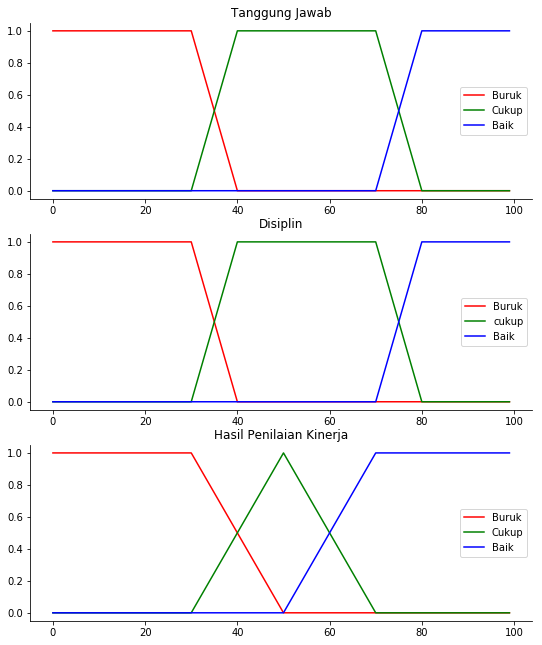

In [4]:
### Visualisasi fungsi semesta dan fungsi keanggotaan fuzzy
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(9, 11))

ax0.plot(x_tanggungj, tanggungj_bad, 'r', linewidth=1.5, label='Buruk')
ax0.plot(x_tanggungj, tanggungj_nor, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_tanggungj, tanggungj_god, 'b', linewidth=1.5, label='Baik')

ax0.set_title('Tanggung Jawab')
ax0.legend()

ax1.plot(x_disiplin, disiplin_bad, 'r', linewidth=1.5, label='Buruk')
ax1.plot(x_disiplin, disiplin_nor, 'g', linewidth=1.5, label='cukup')
ax1.plot(x_disiplin, disiplin_god, 'b', linewidth=1.5, label='Baik')

ax1.set_title('Disiplin')
ax1.legend()

ax2.plot(x_hasilpenilaian, hasil_buruk, 'r', linewidth=1.5, label='Buruk')
ax2.plot(x_hasilpenilaian, hasil_cukup, 'g', linewidth=1.5, label='Cukup')
ax2.plot(x_hasilpenilaian, hasil_baik, 'b', linewidth=1.5, label='Baik')


ax2.set_title('Hasil Penilaian Kinerja')
ax2.legend()

for ax in(ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout

### Simulasi contoh kasus

<justify>Pada kolom fuzzifikasi fungsi in1[] dan in2[] adalah sebuah variabel array untuk menampung hasil penghitungan dari fungsi derajat keanggotaan. in1[] akan menggunakan 3 alamat memori yaitu contoh : in1[1...3].</justify>

In [123]:
#Input

in_tanggungjawab = 38
in_disiplin = 31

In [124]:
## Fuzzyfication #Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_tanggungj, tanggungj_bad, in_tanggungjawab))
in1.append(fuzz.interp_membership(x_tanggungj, tanggungj_nor, in_tanggungjawab))
in1.append(fuzz.interp_membership(x_tanggungj, tanggungj_god, in_tanggungjawab))
in2 = []
in2.append(fuzz.interp_membership(x_disiplin, disiplin_bad, in_disiplin))
in2.append(fuzz.interp_membership(x_disiplin, disiplin_nor, in_disiplin))
in2.append(fuzz.interp_membership(x_disiplin, disiplin_god, in_disiplin))

print("Derajat Keanggotaan Tanggung Jawab")
if in1[0]>0 :
    print("Buruk : "+ str(in1[0]))
if in1[1]>0 :
    print("Cukup  : "+ str(in1[1]))
if in1[2]>0 :
    print("Baik : "+ str(in1[2]))

print("")
print("Derajat Keanggotaan Kedisiplinan")
if in2[0]>0 :
    print("Buruk : "+ str(in2[0]))
if in2[1]>0 :
    print("Cukup  : "+ str(in2[1]))
if in2[2]>0 :
    print("Baik : "+ str(in2[2]))

Derajat Keanggotaan Tanggung Jawab
Buruk : 0.2
Cukup  : 0.8

Derajat Keanggotaan Kedisiplinan
Buruk : 0.9
Cukup  : 0.1


## Pada metode tsukamoto rumus nya adalah

$$Z = \sum_{i=0}^{\infty} \frac{(\alpha_i*Z_i)}{\alpha_i}$$
    
dimana nilai z dapat dicari dari persamaan 

fungsi turun =$$\alpha = \frac{(z-x)}{x-y}$$

dan fungsi naik =$$\alpha = \frac{(z-x)}{x-y}$$

dimana nilai $\alpha$ adalah nilai minimum dari perbandingan tiap himpunan derajat keanggotaan.

$----------------------------------------------------------------$

<justify>Pada pendefinisian rule base di bawah apred1 hingga seterusnya adalah nilai alfa predikat atau yang kita sebut sebaga nilai minimum tersebut. z1 adalah rumus mencari nilai z pada tsukamoto yang didapatkan dari persamaan diatas. terdapat 9 rule </justify>

| No | Tanggung Jawab|   Disiplin  |   Kinerja   | 
|----|---------------|-------------|-------------|
| 1  |    Baik       |    Baik     |    Baik     |
| 2  |    Baik       |    Cukup    |    Cukup    |
| 3  |    Baik       |    Buruk    |    Buruk    | 
| 4  |    Cukup      |    Baik     |    Cukup    |
| 5  |    Cukup      |    Cukup    |    Cukup    | 
| 6  |    Cukup      |    Buruk    |    Buruk    | 
| 7  |    Buruk      |    Baik     |    Buruk    | 
| 8  |    Buruk      |    Cukup    |    Buruk    | 
| 9  |    Buruk      |    Buruk    |    Buruk    | 

<center>__Aturan Fuzzy__
    
Dimana nilai Baik didefinisikan sebagai 2, cukup 1, dan buruk 0. Contoh : apred1  = np.fmin(in1[2], in2[2]), pada array in1[x], nilai x tersebut adalah nilai linguistiknya.

In [128]:
## Pendefinisian Rule Base

apred1  = np.fmin(in1[2], in2[2])
z1      = 50 + (apred1*20)

apred2  = np.fmin(in1[2], in2[1])
z2      = (70+(20*apred2))

apred3  = np.fmin(in1[2], in2[0])
z3      = 50 - (20*apred3)

apred4  = np.fmin(in1[1], in2[2])
z4      = (70+(20*apred2))

apred5  = np.fmin(in1[1], in2[1])
z5      = (70+(20*apred2))

apred6  = np.fmin(in1[1], in2[0])
z6      = 50 - (20*apred6)

apred7  = np.fmin(in1[0], in2[2])
z7      = 50 - (20*apred7)

apred8  = np.fmin(in1[0], in2[1])
z8      = 50 - (20*apred8)

apred9  = np.fmin(in1[0], in2[0])
z9      = 50 - (20*apred9)

#### Pada defuzzifikasi tinggal memasukkan rumus $$Z = \sum_{i=0}^{\infty} \frac{(\alpha_i*Z_i)}{\alpha_i}$$

In [127]:
print(z1,z2,z3,z4,z5,z6,z7,z8,z9)
## Defuzzyfication

z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4 + apred5*z5 + apred6*z6 + apred7*z7 +apred8*z8 + apred9*z9)/ (apred1 + apred2+ apred3 + apred4 + apred5 + apred6 + apred7 + apred8 + apred9)
print("Kinerja Pegawai : "+ str(int((z))) )

50.0 70.0 50.0 70.0 70.0 34.0 50.0 48.0 46.0
Kinerja Pegawai : 40


### Aktivasi Fungsi dari rule-rule yang telah dibuat

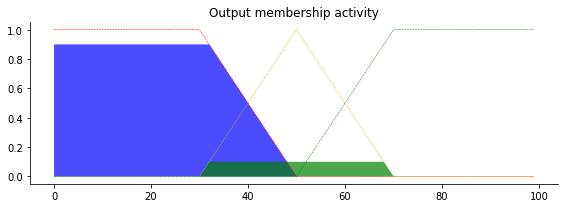

In [126]:
act_tanggungj_bad  = fuzz.interp_membership(x_tanggungj, tanggungj_bad, in_tanggungjawab)
act_tanggungj_nor  = fuzz.interp_membership(x_tanggungj, tanggungj_nor, in_tanggungjawab)
act_tanggungj_god  = fuzz.interp_membership(x_tanggungj, tanggungj_god, in_tanggungjawab)

act_disiplin_bad = fuzz.interp_membership(x_disiplin, disiplin_bad, in_disiplin)
act_disiplin_nor = fuzz.interp_membership(x_disiplin, disiplin_nor, in_disiplin)
act_disiplin_god = fuzz.interp_membership(x_disiplin, disiplin_god, in_disiplin)

active_rule1 = np.fmax(act_tanggungj_god, act_disiplin_god)
act_hasil_baik = np.fmin(active_rule1, hasil_baik)

active_rule2 = np.fmax(act_tanggungj_god, act_disiplin_nor)
act_hasil_cukup = np.fmin(active_rule2, hasil_cukup)

active_rule3 = np.fmax(act_tanggungj_god, act_disiplin_bad)
act_hasil_buruk= np.fmin(active_rule3, hasil_buruk)

active_rule4 = np.fmax(act_tanggungj_nor, act_disiplin_god)
act_hasil_cukup2 = np.fmin(active_rule4, hasil_cukup)

active_rule5 = np.fmax(act_tanggungj_nor, act_disiplin_nor)
act_hasil_cukup3 = np.fmin(active_rule5, hasil_cukup)

active_rule6 = np.fmax(act_tanggungj_nor, act_disiplin_bad)
act_hasil_buruk2 = np.fmin(active_rule6, hasil_buruk)

active_rule7 = np.fmax(act_tanggungj_bad, act_disiplin_god)
act_hasil_buruk3 = np.fmin(active_rule7, hasil_buruk)

active_rule8 = np.fmax(act_tanggungj_bad, act_disiplin_nor)
act_hasil_buruk4 = np.fmin(active_rule8, hasil_buruk)

active_rule9 = np.fmax(act_tanggungj_bad, act_disiplin_bad)
act_hasil_buruk5 = np.fmin(active_rule9, hasil_buruk)


tip0 = np.zeros_like(x_hasilpenilaian)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_hasilpenilaian, tip0, act_hasil_buruk, facecolor='b', alpha=0.7)
ax0.plot(x_hasilpenilaian, hasil_buruk, 'r', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_hasilpenilaian, tip0, act_hasil_cukup, facecolor='g', alpha=0.7)
ax0.plot(x_hasilpenilaian, hasil_cukup, 'y', linewidth=0.5, linestyle='--')

ax0.fill_between(x_hasilpenilaian, tip0, act_hasil_baik, facecolor='r', alpha=0.7)
ax0.plot(x_hasilpenilaian, hasil_baik, 'g', linewidth=0.5, linestyle='--', )

ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()